## Loading

In [1]:
!pip install opendatasets
import opendatasets as od
od.download('https://kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Yashasvee2k3
Your Kaggle Key: ··········


100%|██████████| 734k/734k [00:00<00:00, 69.8MB/s]

In [2]:
# 1 - yes diabetes
# 0- no diabetes
import pandas as pd
df = pd.read_csv("/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## EDA

- standardisation, normalisation even encoding in many cases not req for non dist based ML models
- encoding smoking history?

In [4]:
df.isna().sum()
# NO NULL values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
print(df.value_counts("gender"))
print(df.value_counts("age"))
print(df.value_counts("hypertension"))
print(df.value_counts("heart_disease"))
print(df.value_counts("smoking_history"))
print(df.value_counts("bmi"))
print(df.value_counts("diabetes"))


gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
51.09        1
13.88        1
13.77        1
13.64        1
95.69        1
Name: count, Length: 4247, dtype: int64
diabetes
0    91500
1     8500
Name: count, dtype: int64


## more EDA, FE


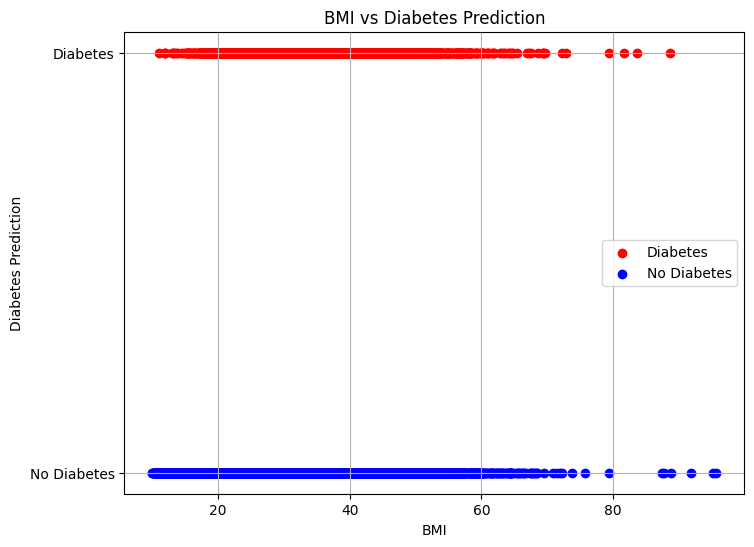

Correlation between BMI and positive diabetes: 0.21435740579951063


In [9]:
# Separate data into diabetes and no diabetes groups
import matplotlib.pyplot as plt
diabetes_yes = df[df['diabetes'] == 1]
diabetes_no = df[df['diabetes'] == 0]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_yes['bmi'], [1] * len(diabetes_yes), color='red', label='Diabetes')
plt.scatter(diabetes_no['bmi'], [0] * len(diabetes_no), color='blue', label='No Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes Prediction')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('BMI vs Diabetes Prediction')
plt.legend()
plt.grid(True)
plt.show()
# Calculate the correlation coefficient between BMI and positive diabetes
correlation = df['bmi'].corr(df['diabetes'])

print("Correlation between BMI and positive diabetes:", correlation)


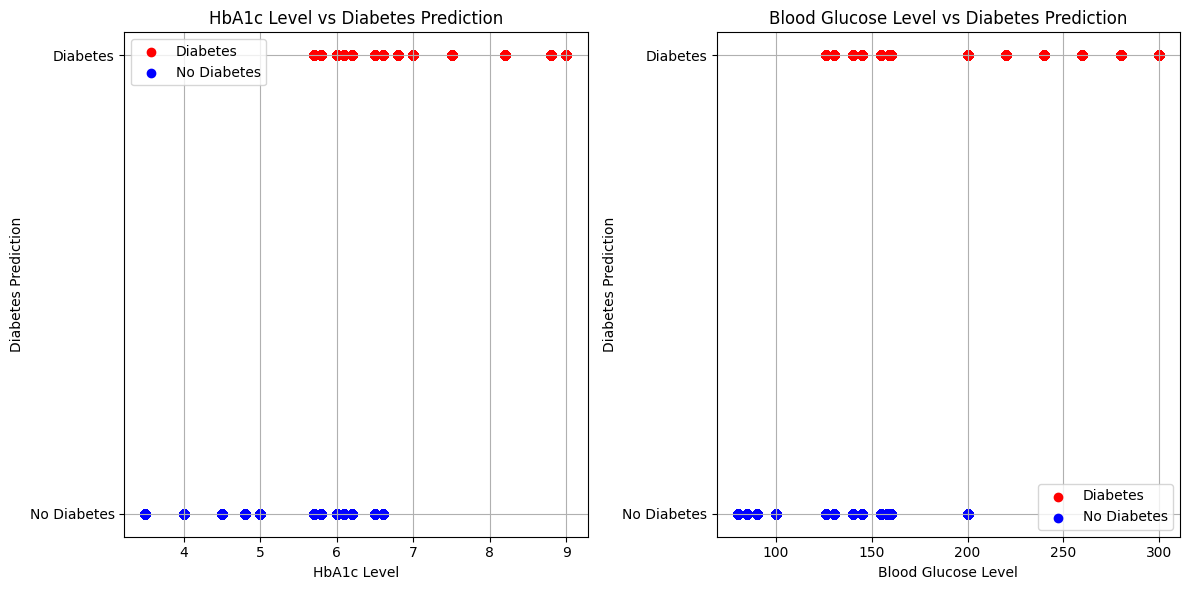

Correlation between Hb1ac and positive diabetes: 0.4006603146474886
Correlation between Blood glucose leve and positive diabetes: 0.41955799602055444


In [13]:
# Create scatter plots for HbA1c_level
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(diabetes_yes['HbA1c_level'], [1] * len(diabetes_yes), color='red', label='Diabetes')
plt.scatter(diabetes_no['HbA1c_level'], [0] * len(diabetes_no), color='blue', label='No Diabetes')
plt.xlabel('HbA1c Level')
plt.ylabel('Diabetes Prediction')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('HbA1c Level vs Diabetes Prediction')
plt.legend()
plt.grid(True)

# Create scatter plots for blood_glucose_level
plt.subplot(1, 2, 2)
plt.scatter(diabetes_yes['blood_glucose_level'], [1] * len(diabetes_yes), color='red', label='Diabetes')
plt.scatter(diabetes_no['blood_glucose_level'], [0] * len(diabetes_no), color='blue', label='No Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes Prediction')
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Blood Glucose Level vs Diabetes Prediction')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

correlation = df['HbA1c_level'].corr(df['diabetes'])

print("Correlation between Hb1ac and positive diabetes:", correlation)

correlation = df['blood_glucose_level'].corr(df['diabetes'])

print("Correlation between Blood glucose level and positive diabetes:", correlation)

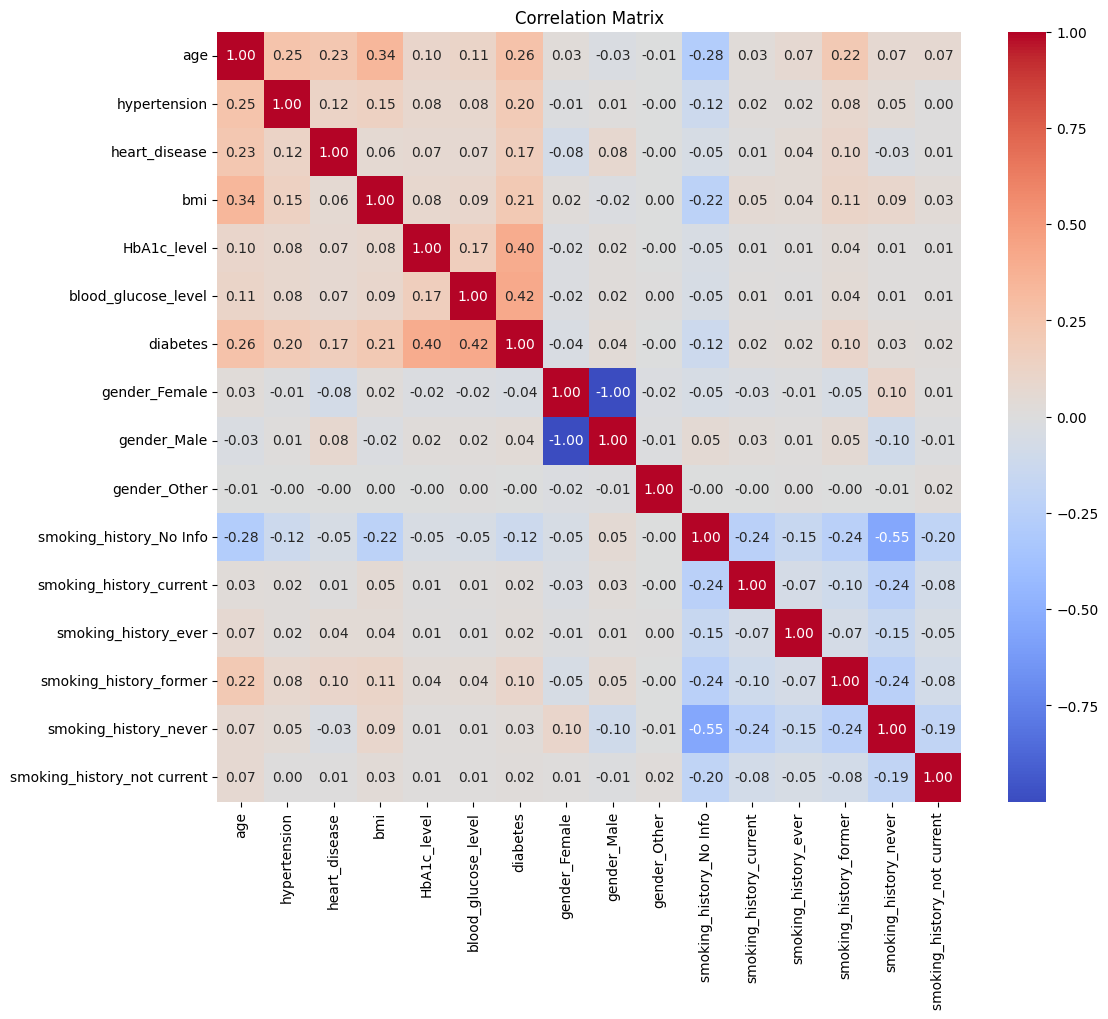

In [15]:
import seaborn as sns
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [17]:
df_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False


## Model training, testing, metrics
- NOTE : model.fit() does not accept dataframe with string values

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score



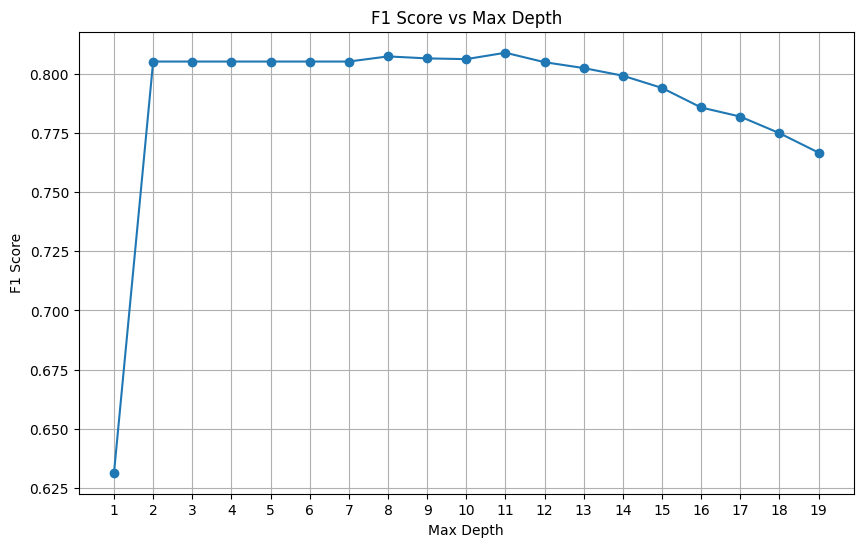

(1, 0.6314102564102564) (2, 0.8051766351871283) (3, 0.8051766351871283) (4, 0.8051766351871283) (5, 0.8051766351871283) (6, 0.8051766351871283) (7, 0.8051766351871283) (8, 0.8073458073458074) (9, 0.8065074420214607) (10, 0.8061962134251291) (11, 0.808904109589041) (12, 0.804902962206333) (13, 0.8024193548387097) (14, 0.7991954408313777) (15, 0.7940199335548173) (16, 0.7857609405617243) (17, 0.7819114817190507) (18, 0.7749124482648838) (19, 0.7666874610106051) 

In [45]:
# Initialize lists to store max_depth values and corresponding F1 scores
max_depth_values = []
f1_scores = []

# Try different values of max_depth and calculate F1 score for each
for max_depth in range(1, 20):
    # Initialize the Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)

    # Train the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)

    # Append max_depth and F1 score to the lists
    max_depth_values.append(max_depth)
    f1_scores.append(f1)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, f1_scores, marker='o', linestyle='-')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Max Depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

for a,b in zip(max_depth_values, f1_scores):
    print(f"({a}, {b})", end = " ")

In [47]:
# Split the data into features (X) and target (y)
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini",max_depth=11,random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9721
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
[[18261    31]
 [  527  1181]]
F1 Score: 0.808904109589041


## Visualising Decision Tree

In [19]:
!pip install graphviz
!pip install pydotplus

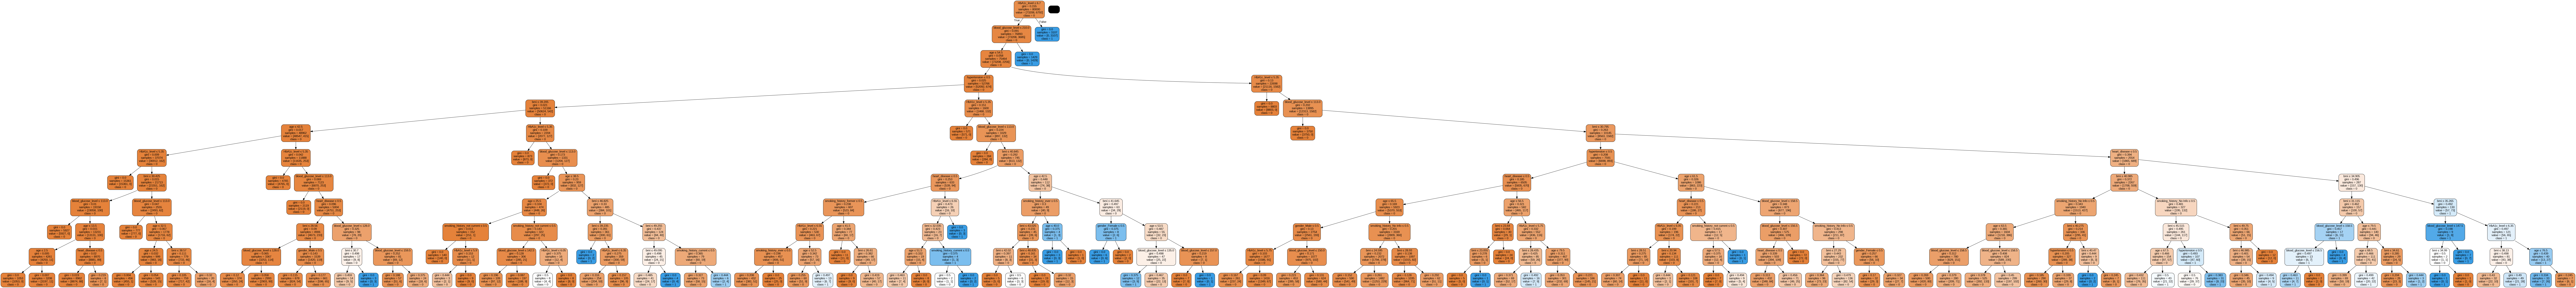

In [48]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())
